Reset: Pipette Position [0.073  0.0895 0.1195], Goal Position [ 0.19390228 -0.07470058  0.2252308 ]
Step 1 called.
Step 1: Position [0.073  0.0895 0.1195], Target [ 0.19390228 -0.07470058  0.2252308 ], Error 0.2296915203332901
Step 2 called.
Step 2: Position [0.0735 0.0889 0.12  ], Target [ 0.19390228 -0.07470058  0.2252308 ], Error 0.22876927256584167
Step 3 called.
Step 3: Position [0.0739 0.0884 0.1204], Target [ 0.19390228 -0.07470058  0.2252308 ], Error 0.228017196059227
Step 4 called.
Step 4: Position [0.0744 0.0878 0.1209], Target [ 0.19390228 -0.07470058  0.2252308 ], Error 0.22709502279758453
Step 5 called.
Step 5: Position [0.0748 0.0873 0.1213], Target [ 0.19390228 -0.07470058  0.2252308 ], Error 0.22634300589561462
Step 6 called.
Step 6: Position [0.0753 0.0867 0.1217], Target [ 0.19390228 -0.07470058  0.2252308 ], Error 0.225466787815094
Step 7 called.
Step 7: Position [0.0758 0.0862 0.1222], Target [ 0.19390228 -0.07470058  0.2252308 ], Error 0.22461631894111633
Step 8 ca

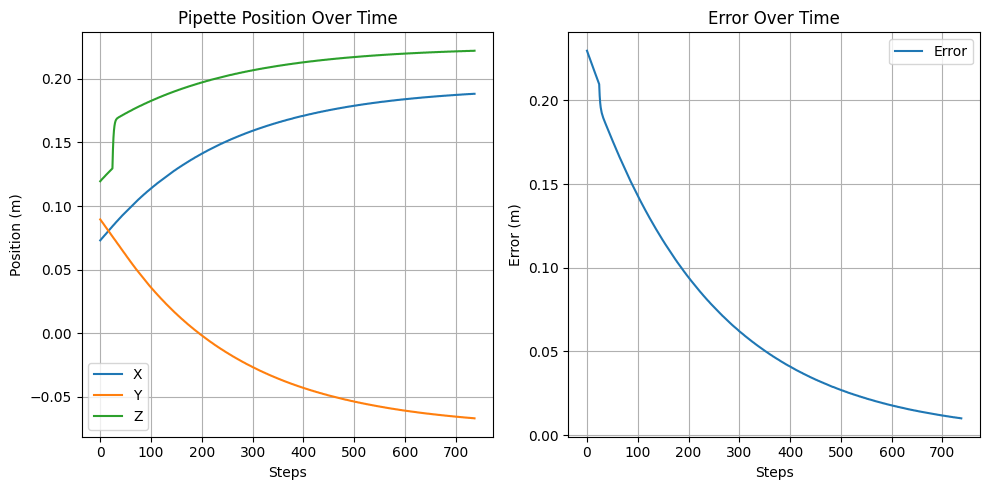

In [1]:
import numpy as np
from PIDController import PIDController  # Import your PID controller
from OT2Eenv import OT2Env       # Import your environment
import matplotlib.pyplot as plt

# Initialize environment
env = OT2Env()
obs, _ = env.reset()

# PID controllers for X, Y, Z axes
pid_x = PIDController(kp=1.0, ki=0.1, kd=0.01)
pid_y = PIDController(kp=1.0, ki=0.1, kd=0.01)
pid_z = PIDController(kp=1.0, ki=0.1, kd=0.01)

# Define a target position (goal)
target_position = obs[-3:]  # Extract goal position from observation

# Logs for analysis
positions = []  # Track pipette positions
errors = []     # Track error distances
rewards = []    # Track rewards
steps = 0       # Step counter

# Testing loop
terminated, truncated = False, False
while not (terminated or truncated):
    # Current pipette position
    current_position = obs[:3]

    # Calculate errors for each axis
    error_x = target_position[0] - current_position[0]
    error_y = target_position[1] - current_position[1]
    error_z = target_position[2] - current_position[2]

    # PID outputs for each axis (using 'compute' instead of 'update')
    control_x = pid_x.compute(error_x)
    control_y = pid_y.compute(error_y)
    control_z = pid_z.compute(error_z)

    # Combine into a single action
    action = np.array([control_x, control_y, control_z], dtype=np.float32)

    # Step the environment
    obs, reward, terminated, truncated, _ = env.step(action)

    # Logging
    positions.append(current_position)
    errors.append(np.linalg.norm(np.array(target_position) - np.array(current_position)))
    rewards.append(reward)
    steps += 1

    # Print step info
    print(f"Step {steps}: Position {current_position}, Target {target_position}, Error {errors[-1]}")

    # Check if the goal is reached within the threshold
    if np.linalg.norm(np.array(target_position) - np.array(current_position)) < 0.01:  # 10 mm tolerance
        print("Goal reached within tolerance.")
        terminated = True

# Close the environment
env.close()

# Plot results
positions = np.array(positions)
errors = np.array(errors)

plt.figure(figsize=(10, 5))

# Plot 3D position
plt.subplot(1, 2, 1)
plt.plot(positions[:, 0], label='X')
plt.plot(positions[:, 1], label='Y')
plt.plot(positions[:, 2], label='Z')
plt.title("Pipette Position Over Time")
plt.xlabel("Steps")
plt.ylabel("Position (m)")
plt.legend()
plt.grid()

# Plot error over time
plt.subplot(1, 2, 2)
plt.plot(errors, label='Error')
plt.title("Error Over Time")
plt.xlabel("Steps")
plt.ylabel("Error (m)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
